Generating FIA IBMS diagrams...



/tmp/ipykernel_9214/121595980.py:202: UserWarning: Glyph 128211 (\N{NOTEBOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_9214/121595980.py:203: UserWarning: Glyph 128211 (\N{NOTEBOOK}) missing from font(s) DejaVu Sans.
  plt.savefig('~/ml-projects/python-projects/IBMS_LLM/workflow/diagram_1_project_workflow.png', dpi=200,


FileNotFoundError: [Errno 2] No such file or directory: '~/ml-projects/python-projects/IBMS_LLM/workflow/diagram_1_project_workflow.png'

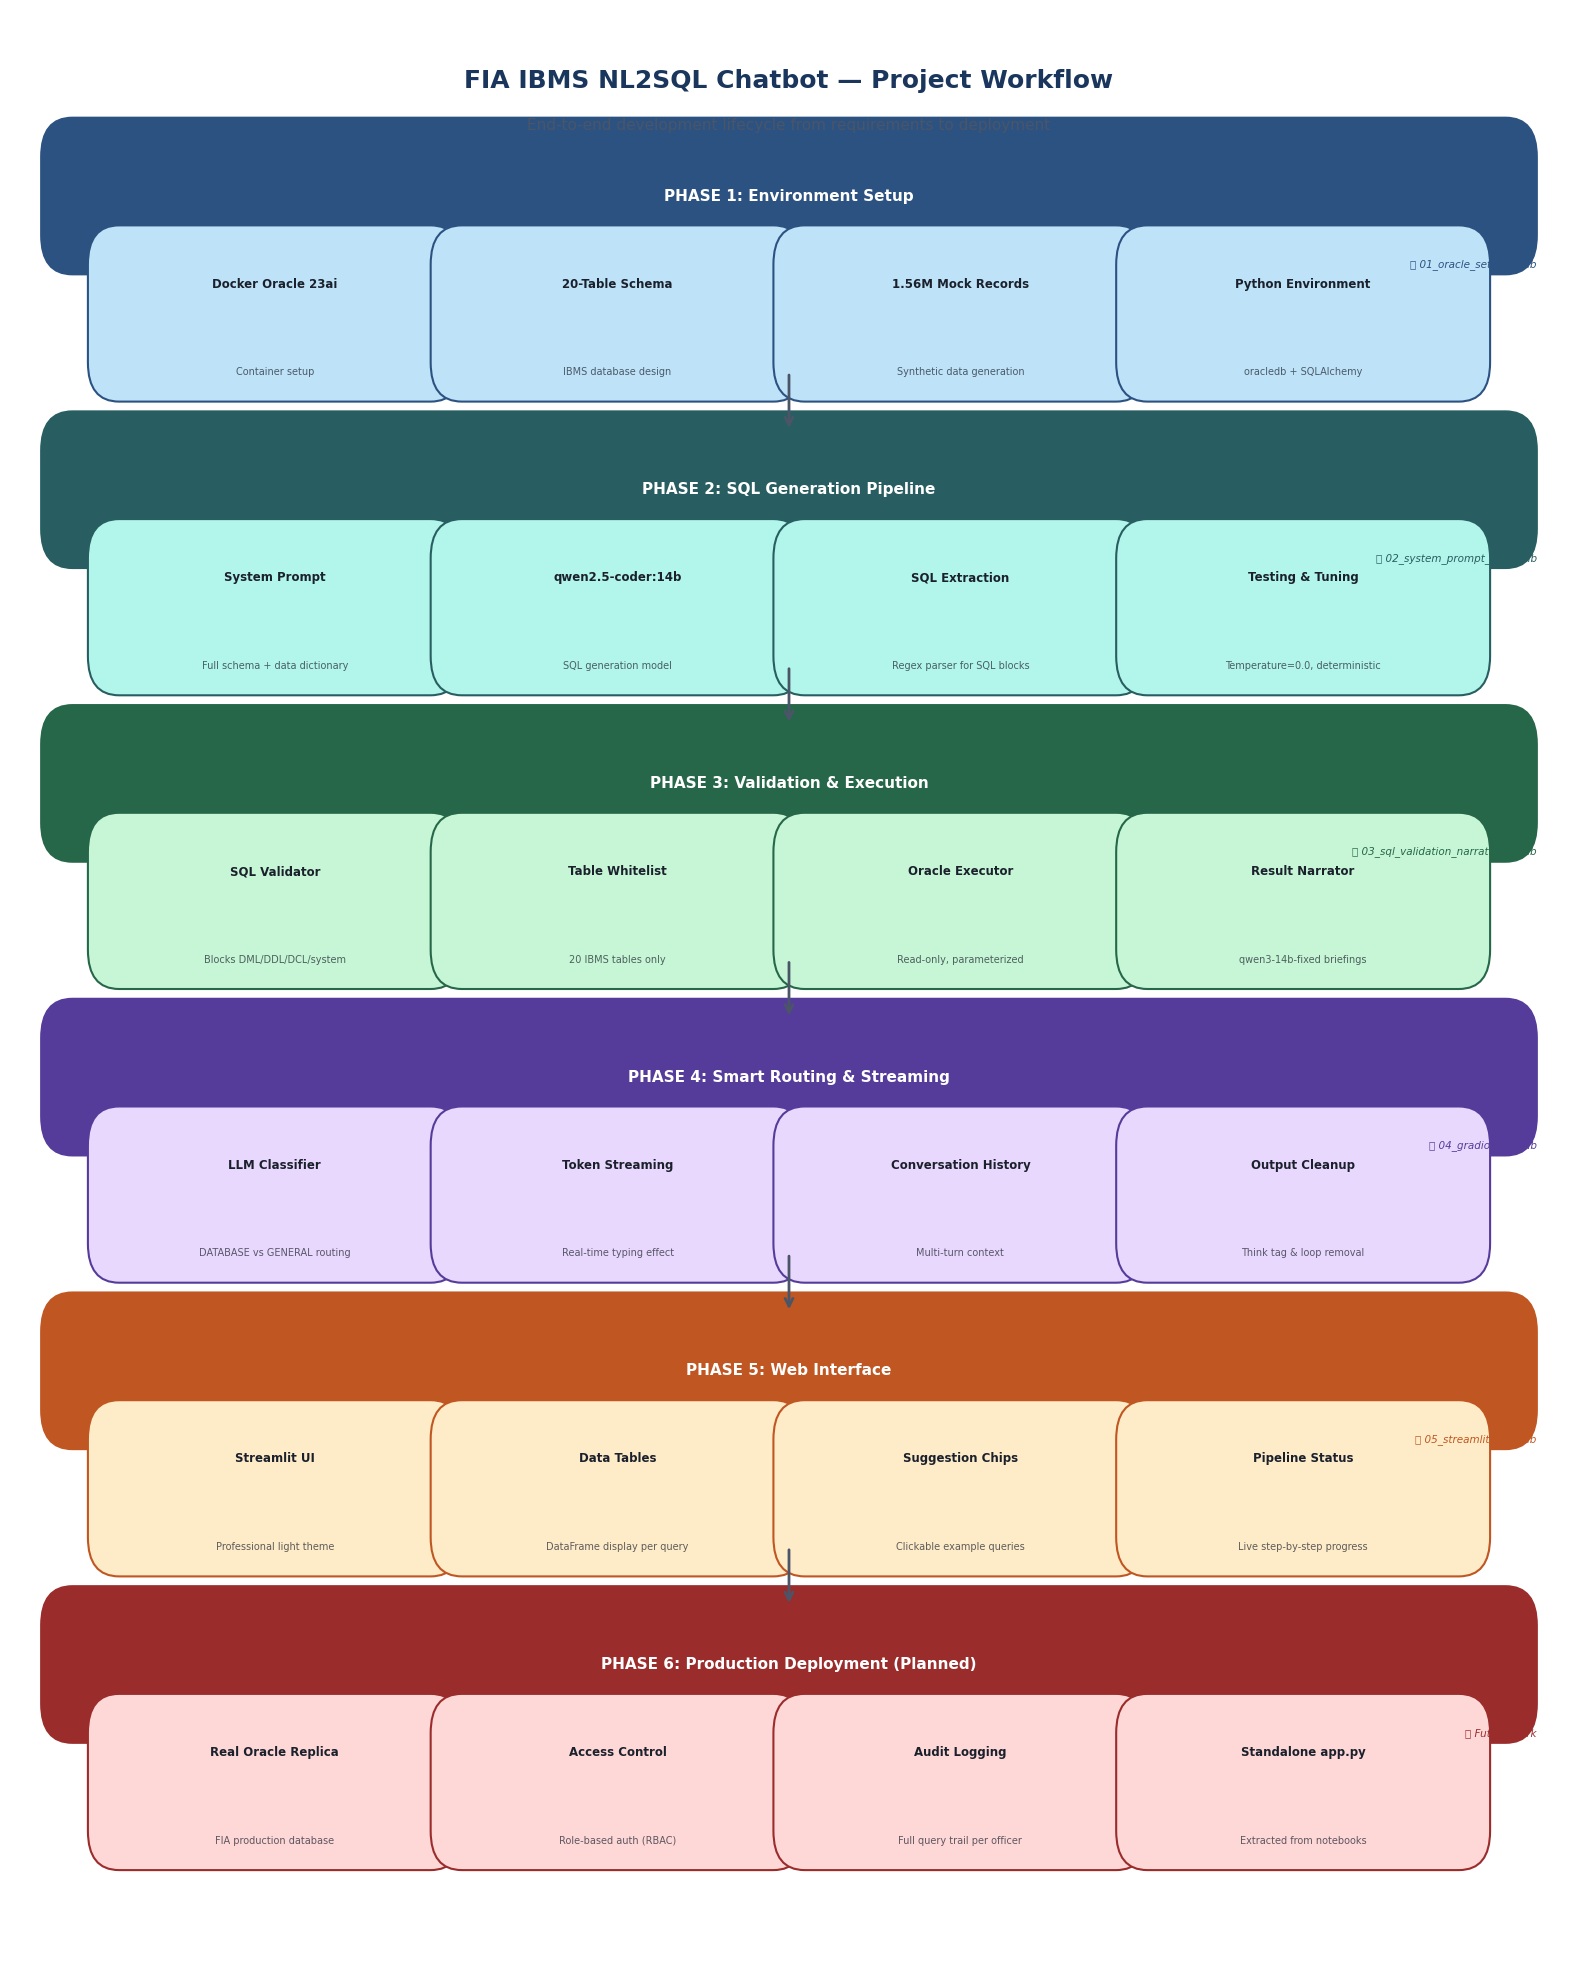

In [ ]:
"""
FIA IBMS NL2SQL Chatbot — Project Diagrams
Min font: 14pt | No overlaps | Output: ~/ml-projects/python-projects/IBMS_LLM/output/
"""

import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
from pathlib import Path

plt.rcParams['font.family'] = 'DejaVu Sans'

# Output directory
OUT_DIR = Path.home() / "ml-projects" / "python-projects" / "IBMS_LLM" / "output"
OUT_DIR.mkdir(parents=True, exist_ok=True)

C = {
    'navy':    '#1a365d', 'blue':    '#2c5282', 'lblue':   '#bee3f8', 'sky':     '#e8f0fe',
    'teal':    '#285e61', 'lteal':   '#b2f5ea',
    'green':   '#276749', 'lgreen':  '#c6f6d5',
    'orange':  '#c05621', 'lorange': '#feebc8',
    'red':     '#9b2c2c', 'lred':    '#fed7d7',
    'purple':  '#553c9a', 'lpurple': '#e9d8fd',
    'gray':    '#4a5568', 'lgray':   '#edf2f7',
    'white':   '#ffffff',
}


def box(ax, x, y, w, h, label, fc, ec, fs=16, fw='bold', fc_text='#1a202c',
        sub=None, sub_fs=14, lw=2):
    b = FancyBboxPatch((x - w/2, y - h/2), w, h, boxstyle="round,pad=0.02",
                        facecolor=fc, edgecolor=ec, linewidth=lw, zorder=3)
    ax.add_patch(b)
    if sub:
        ax.text(x, y + h * 0.15, label, ha='center', va='center', fontsize=fs,
                fontweight=fw, color=fc_text, zorder=5)
        ax.text(x, y - h * 0.2, sub, ha='center', va='center',
                fontsize=sub_fs, color=fc_text, alpha=0.6, zorder=5)
    else:
        ax.text(x, y, label, ha='center', va='center', fontsize=fs,
                fontweight=fw, color=fc_text, zorder=5)


def arrow(ax, x1, y1, x2, y2, color='#4a5568', lw=2.5):
    ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                arrowprops=dict(arrowstyle='->', color=color, lw=lw))


def circle_num(ax, x, y, r, text, bg):
    c = plt.Circle((x, y), r, color=bg, zorder=5)
    ax.add_patch(c)
    ax.text(x, y, text, ha='center', va='center', fontsize=18,
            fontweight='bold', color='white', zorder=6)


# ══════════════════════════════════════════════════════════════
# DIAGRAM 1: Project Workflow
# ══════════════════════════════════════════════════════════════
def diagram_project_workflow():
    fig, ax = plt.subplots(figsize=(24, 36))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    ax.text(0.5, 0.98, 'FIA IBMS NL2SQL Chatbot', ha='center', va='top',
            fontsize=28, fontweight='bold', color=C['navy'])
    ax.text(0.5, 0.965, 'COMPLETE PROJECT WORKFLOW', ha='center', va='top',
            fontsize=20, fontweight='bold', color=C['blue'])

    phases = [
        ('PHASE 1 : ENVIRONMENT SETUP', C['lblue'], C['blue'], 0.91,
         [('Docker Oracle 23ai', 'Container setup'),
          ('20-Table Schema', 'Database design'),
          ('1.56M Records', 'Synthetic data'),
          ('Python Stack', 'oracledb + SQLAlchemy')]),

        ('PHASE 2 : SQL GENERATION', C['lteal'], C['teal'], 0.77,
         [('System Prompt', 'Schema + dictionary'),
          ('qwen2.5-coder:14b', 'Code-specialist LLM'),
          ('SQL Extraction', 'Regex parser'),
          ('Tuning', 'temp=0.0')]),

        ('PHASE 3 : VALIDATION & EXECUTION', C['lgreen'], C['green'], 0.63,
         [('SQL Validator', 'Blocks DML/DDL/DCL'),
          ('Table Whitelist', '20 tables only'),
          ('Oracle Executor', 'Read-only execution'),
          ('Result Narrator', 'Intelligence briefing')]),

        ('PHASE 4 : SMART ROUTING', C['lpurple'], C['purple'], 0.49,
         [('LLM Classifier', 'DB vs GENERAL'),
          ('Token Streaming', 'Typing effect'),
          ('Conversation Ctx', 'Multi-turn history'),
          ('Output Cleanup', 'Think-tag removal')]),

        ('PHASE 5 : WEB INTERFACE', C['lorange'], C['orange'], 0.35,
         [('Streamlit App', 'Light prof. theme'),
          ('Data Tables', 'DataFrame display'),
          ('Suggestion Chips', 'Clickable queries'),
          ('Pipeline Status', 'Live progress')]),

        ('PHASE 6 : PRODUCTION (PLANNED)', C['lred'], C['red'], 0.21,
         [('Real Oracle', 'FIA replica'),
          ('Access Control', 'Role-based auth'),
          ('Audit Logging', 'Full query trail'),
          ('Standalone Deploy', 'app.py extraction')]),
    ]

    for label, fc, ec, y, items in phases:
        # Header bar
        box(ax, 0.5, y + 0.045, 0.90, 0.035, label,
            ec, ec, fs=18, fw='bold', fc_text=C['white'])

        # 4 item boxes in a row
        positions = [0.16, 0.39, 0.61, 0.84]
        for i, (title, subtitle) in enumerate(items):
            box(ax, positions[i], y - 0.02, 0.20, 0.055, title,
                fc, ec, fs=15, fw='bold', sub=subtitle, sub_fs=13)

        # Arrow to next phase
        if y > 0.25:
            arrow(ax, 0.5, y - 0.055, 0.5, y - 0.09, C['gray'], 3)

    # Notebook tags
    notebooks = [
        (0.91, '01_oracle_setup.ipynb', C['blue']),
        (0.77, '02_system_prompt_sql.ipynb', C['teal']),
        (0.63, '03_sql_validation_narration.ipynb', C['green']),
        (0.49, '04_gradio_ui.ipynb', C['purple']),
        (0.35, '05_streamlit_ui.ipynb', C['orange']),
        (0.21, 'Future work', C['red']),
    ]
    for ny, lbl, clr in notebooks:
        ax.text(0.98, ny + 0.045, lbl, ha='right', va='center',
                fontsize=14, color=clr, fontstyle='italic')

    plt.tight_layout()
    plt.savefig(OUT_DIR / 'diagram_1_project_workflow.png', dpi=150,
                bbox_inches='tight', facecolor='white')
    plt.close()
    print(f"[OK] Diagram 1 saved to {OUT_DIR}/diagram_1_project_workflow.png")


# ══════════════════════════════════════════════════════════════
# DIAGRAM 2: System Architecture
# ══════════════════════════════════════════════════════════════
def diagram_architecture():
    fig, ax = plt.subplots(figsize=(26, 30))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    ax.text(0.5, 0.98, 'FIA IBMS NL2SQL Chatbot', ha='center', va='top',
            fontsize=28, fontweight='bold', color=C['navy'])
    ax.text(0.5, 0.965, 'SYSTEM ARCHITECTURE', ha='center', va='top',
            fontsize=20, fontweight='bold', color=C['blue'])

    # ── User ──
    box(ax, 0.5, 0.92, 0.28, 0.035, 'FIA OFFICER', C['sky'], C['blue'],
        fs=20, fw='bold', sub='Natural language questions', sub_fs=15)
    arrow(ax, 0.5, 0.90, 0.5, 0.875, C['blue'], 3)

    # ── Web Interface ──
    box(ax, 0.5, 0.855, 0.80, 0.035, 'WEB INTERFACE  --  Streamlit',
        C['lorange'], C['orange'], fs=18, fw='bold')

    ui_labels = ['Chat Interface', 'Suggestion Chips', 'Data Tables', 'Pipeline Status']
    for i, lbl in enumerate(ui_labels):
        xi = 0.175 + i * 0.22
        box(ax, xi, 0.815, 0.19, 0.025, lbl, C['white'], C['orange'], fs=14, fw='normal')

    arrow(ax, 0.5, 0.80, 0.5, 0.775, C['gray'], 3)

    # ── Classifier ──
    box(ax, 0.5, 0.75, 0.45, 0.04, 'QUERY CLASSIFIER', C['lpurple'], C['purple'],
        fs=20, fw='bold', sub='qwen3-14b-fixed', sub_fs=15)

    # Split arrows
    arrow(ax, 0.35, 0.73, 0.22, 0.695, C['teal'], 3)
    arrow(ax, 0.65, 0.73, 0.78, 0.695, C['purple'], 3)

    ax.text(0.26, 0.715, 'DATABASE', ha='center', fontsize=16, fontweight='bold', color=C['teal'],
            bbox=dict(boxstyle='round,pad=0.2', facecolor=C['lteal'], edgecolor=C['teal'], lw=1.5))
    ax.text(0.74, 0.715, 'GENERAL', ha='center', fontsize=16, fontweight='bold', color=C['purple'],
            bbox=dict(boxstyle='round,pad=0.2', facecolor=C['lpurple'], edgecolor=C['purple'], lw=1.5))

    # ── DATABASE PATH (left) ──
    db_x = 0.25
    db_steps = [
        (0.66, 'SQL GENERATOR', 'qwen2.5-coder:14b  |  temp=0.0', C['lteal'], C['teal']),
        (0.59, 'SQL VALIDATOR', 'Blocks DML / DDL / DCL / SYS', C['lgreen'], C['green']),
        (0.52, 'ORACLE DATABASE', '23ai  |  20 tables  |  1.56M rows', C['lblue'], C['blue']),
        (0.45, 'RESULT NARRATOR', 'qwen3-14b-fixed  |  Briefing', C['lpurple'], C['purple']),
    ]
    for i, (y, title, sub, fc, ec) in enumerate(db_steps):
        box(ax, db_x, y, 0.38, 0.04, title, fc, ec, fs=17, fw='bold', sub=sub, sub_fs=14)
        if i < len(db_steps) - 1:
            ny = db_steps[i + 1][0]
            arrow(ax, db_x, y - 0.025, db_x, ny + 0.025, ec, 2.5)

    # ── GENERAL PATH (right) ──
    gen_x = 0.75
    box(ax, gen_x, 0.66, 0.38, 0.04, 'DIRECT CHAT', C['lpurple'], C['purple'],
        fs=17, fw='bold', sub='qwen3-14b-fixed  |  Conversational', sub_fs=14)
    box(ax, gen_x, 0.59, 0.38, 0.04, 'CONTEXT MANAGER', C['lgray'], C['gray'],
        fs=17, fw='bold', sub='History  |  Follow-ups', sub_fs=14)
    arrow(ax, gen_x, 0.635, gen_x, 0.615, C['purple'], 2.5)

    # ── Merge ──
    arrow(ax, db_x + 0.08, 0.425, 0.45, 0.375, C['gray'], 2.5)
    arrow(ax, gen_x - 0.08, 0.565, 0.55, 0.375, C['gray'], 2.5)

    # ── Streamed Response ──
    box(ax, 0.5, 0.35, 0.55, 0.04, 'STREAMED RESPONSE', C['sky'], C['blue'],
        fs=20, fw='bold', sub='Token-by-token  |  Narration + Table + SQL', sub_fs=15)

    arrow(ax, 0.5, 0.325, 0.5, 0.295, C['blue'], 3)

    # ── Officer receives ──
    box(ax, 0.5, 0.27, 0.30, 0.04, 'Officer Receives Answer', C['sky'], C['blue'],
        fs=17, fw='bold', sub='Briefing + Data + Audit', sub_fs=14)

    # ── Infrastructure ──
    ax.plot([0.05, 0.95], [0.22, 0.22], color=C['gray'], lw=1, ls='--', alpha=0.4)
    ax.text(0.5, 0.21, 'INFRASTRUCTURE', ha='center', fontsize=16,
            fontweight='bold', color=C['gray'])

    for ox, lbl, sub in [
        (0.18, 'OLLAMA SERVER', 'Local LLM inference'),
        (0.50, 'DOCKER', 'Oracle 23ai Free'),
        (0.82, 'HARDWARE', 'RTX 5070 Ti  |  32GB RAM'),
    ]:
        box(ax, ox, 0.175, 0.28, 0.04, lbl, C['lgray'], C['gray'],
            fs=16, fw='bold', sub=sub, sub_fs=14)

    ax.text(0.5, 0.14, 'Lenovo Legion 5 Pro  |  Ubuntu 22.04  |  Fully offline',
            ha='center', fontsize=15, color=C['gray'], fontstyle='italic')

    plt.tight_layout()
    plt.savefig(OUT_DIR / 'diagram_2_architecture.png', dpi=150,
                bbox_inches='tight', facecolor='white')
    plt.close()
    print(f"[OK] Diagram 2 saved to {OUT_DIR}/diagram_2_architecture.png")


# ══════════════════════════════════════════════════════════════
# DIAGRAM 3: Data Pipeline
# ══════════════════════════════════════════════════════════════
def diagram_data_pipeline():
    fig, ax = plt.subplots(figsize=(30, 20))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    ax.text(0.5, 0.97, 'FIA IBMS NL2SQL Chatbot', ha='center', va='top',
            fontsize=28, fontweight='bold', color=C['navy'])
    ax.text(0.5, 0.95, 'DATA PIPELINE  --  STEP-BY-STEP FLOW', ha='center', va='top',
            fontsize=20, fontweight='bold', color=C['blue'])

    steps = [
        ('1', 'INPUT',    'Officer\nQuestion',
         '"Which airlines have\nthe highest off-loading\nrate?"',
         C['sky'], C['blue'], 0.09),
        ('2', 'CLASSIFY', 'Query\nRouter',
         'qwen3-14b-fixed\nResult: DATABASE\nLatency: ~2-3s',
         C['lpurple'], C['purple'], 0.27),
        ('3', 'GENERATE', 'SQL\nGeneration',
         'qwen2.5-coder:14b\nSELECT airline,\nCOUNT(*) FROM ...',
         C['lteal'], C['teal'], 0.45),
        ('4', 'VALIDATE', 'Safety\nCheck',
         'SELECT only\nIBMS table found\nNo injection risk',
         C['lgreen'], C['green'], 0.63),
        ('5', 'EXECUTE',  'Oracle\nQuery',
         'Oracle 23ai Free\nReturns DataFrame\nLatency: ~0.1-0.5s',
         C['lblue'], C['blue'], 0.81),
    ]

    main_y = 0.72
    detail_y = 0.48

    for i, (num, stage, title, detail, fc, ec, x) in enumerate(steps):
        # Number
        circle_num(ax, x, 0.87, 0.025, num, ec)

        # Stage label
        ax.text(x, 0.83, stage, ha='center', va='center', fontsize=16,
                fontweight='bold', color=ec)

        # Main box
        box(ax, x, main_y, 0.14, 0.07, title, fc, ec, fs=17, fw='bold')

        # Dotted line down
        ax.plot([x, x], [main_y - 0.04, detail_y + 0.055], color=ec,
                linewidth=1.5, linestyle=':', zorder=2)

        # Detail box
        box(ax, x, detail_y, 0.15, 0.09, detail, C['white'], ec, fs=14, fw='normal')

        # Arrow to next
        if i < len(steps) - 1:
            nx = steps[i + 1][6]
            arrow(ax, x + 0.075, main_y, nx - 0.075, main_y, C['gray'], 3)

    # Step 6 — NARRATE (separate, slightly offset for breathing room)
    nx = 0.93
    circle_num(ax, nx, 0.87, 0.025, '6', C['orange'])
    ax.text(nx, 0.83, 'NARRATE', ha='center', va='center', fontsize=16,
            fontweight='bold', color=C['orange'])
    box(ax, nx, main_y, 0.12, 0.07, 'Intelligence\nBriefing',
        C['lorange'], C['orange'], fs=16, fw='bold')
    ax.plot([nx, nx], [main_y - 0.04, detail_y + 0.055], color=C['orange'],
            linewidth=1.5, linestyle=':', zorder=2)
    box(ax, nx, detail_y, 0.12, 0.09, 'qwen3-14b-fixed\nStreamed token\nby token',
        C['white'], C['orange'], fs=14, fw='normal')
    arrow(ax, 0.81 + 0.075, main_y, nx - 0.065, main_y, C['gray'], 3)

    # ── Divider ──
    ax.plot([0.04, 0.96], [0.35, 0.35], color=C['gray'], lw=1.2, ls='--', alpha=0.4)
    ax.text(0.5, 0.33, 'OUTPUT DELIVERED TO OFFICER',
            ha='center', fontsize=20, fontweight='bold', color=C['navy'])

    # ── Output boxes ──
    out_y_title = 0.27
    out_y_detail = 0.15

    outputs = [
        (0.20, 'NARRATED BRIEFING',
         '"Kuwait Airways and Serene Air\nare tied at 665 offloads each.\nEtihad follows with 660..."',
         C['sky'], C['blue']),
        (0.50, 'RESULTS TABLE',
         'AIRLINE          | COUNT\nKuwait Airways   |   665\nSerene Air       |   665\nEtihad Airways   |   660',
         C['lgreen'], C['green']),
        (0.80, 'SQL & METADATA',
         'SELECT airline, COUNT(*)\nFROM offloading_records\nGROUP BY airline ...\nTime: 12.9s | 3 rows',
         C['lgray'], C['gray']),
    ]

    for ox, title, detail, fc, ec in outputs:
        box(ax, ox, out_y_title, 0.27, 0.04, title, fc, ec, fs=17, fw='bold')
        box(ax, ox, out_y_detail, 0.27, 0.14, detail, C['white'], ec, fs=15, fw='normal')

    # Timing bar
    ax.text(0.5, 0.04,
            'TOTAL: ~12-20s   |   SQL Gen: ~8-12s   |   Validation: <0.01s   |   Execution: ~0.1-0.5s   |   Narration: ~4-8s',
            ha='center', fontsize=16, color=C['navy'], fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.6', facecolor=C['lgray'],
                     edgecolor=C['gray'], linewidth=1.2))

    plt.tight_layout()
    plt.savefig(OUT_DIR / 'diagram_3_data_pipeline.png', dpi=150,
                bbox_inches='tight', facecolor='white')
    plt.close()
    print(f"[OK] Diagram 3 saved to {OUT_DIR}/diagram_3_data_pipeline.png")


if __name__ == "__main__":
    print(f"Output directory: {OUT_DIR}\n")
    diagram_project_workflow()
    diagram_architecture()
    diagram_data_pipeline()
    print("\nAll 3 diagrams saved.")